# Formato DICOM

*Digital Imaging and Communications in Medicine*

Estándar internacional para transmitir, almacenar, recuperar, imprimir, procesar y visualizar información de imágenes médicas

Integra distintos formatos resultantes de dispositivos de adquisición de imágenes

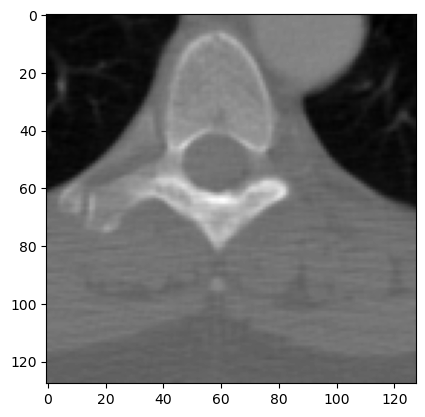

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pydicom import examples
from pydicom import dcmread

ds = examples.ct
plt.imshow(ds.pixel_array, cmap=plt.gray())

## Formato

Datos de un archivo DICOM (.dcm)

In [2]:
# VinDR-Mammo dataset, used for learning purposes
dicom_sample = './data/sample/'

ds = dcmread(dicom_sample + '1/15de2fd7289d8371a8273f87a8393568.dicom')
ds.file_meta

C:\Users\Chef\AppData\Roaming\Python\Python312\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '15de2fd7289d8371a8273f87a8393568'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


(0002,0000) File Meta Information Group Length  UL: 158
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 15de2fd7289d8371a8273f87a8393568
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.3.4
(0002,0013) Implementation Version Name         SH: 'RadiAnt-2020.1.1'

In [3]:
print(f'Resolución: {ds.pixel_array.shape[0]}x{ds.pixel_array.shape[1]}')

Resolución: 3518x2800


In [4]:
dicom_df = pd.read_csv('./data/finding_annotations.csv')

dicom_df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [5]:
print(dicom_df.shape)

(20486, 16)


## Visualización

In [6]:
def get_dcm(path):
    dcm = []
    for idx, file in enumerate(os.listdir(path)):
        dcm.append(file)
    return dcm

In [7]:
def dcm_show_sample(idx, title):
    route = dicom_sample + str(idx) + '/'
    dcm_list = get_dcm(route)
    
    f, ax = plt.subplots(1, 4, figsize=(12, 12))
    f.suptitle(title, y=0.64)

    for i, path in enumerate(dcm_list):
        img = dcmread(route + path)
        
        entry = dicom_df[dicom_df['image_id'] == path.split('.')[0]]
        lat = np.squeeze(entry['laterality'].iloc[0])
        vp = np.squeeze(entry['view_position'].iloc[0])
        
        ax[i].set_title(f'{lat}-{vp}')
        ax[i].axis('off')
        ax[i].imshow(img.pixel_array, cmap=plt.gray())

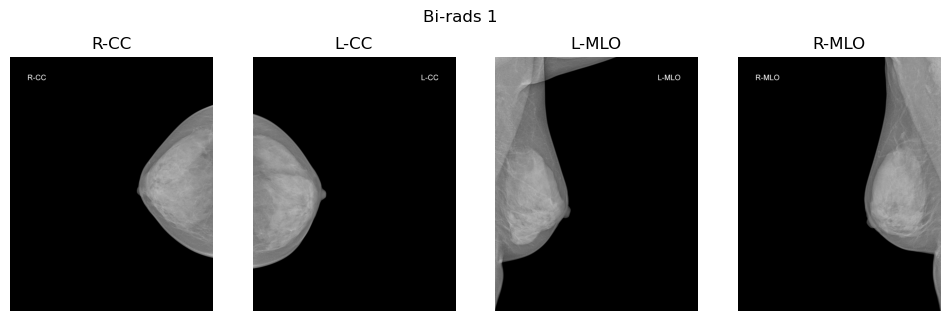

In [8]:
dcm_show_sample(1, 'Bi-rads 1')

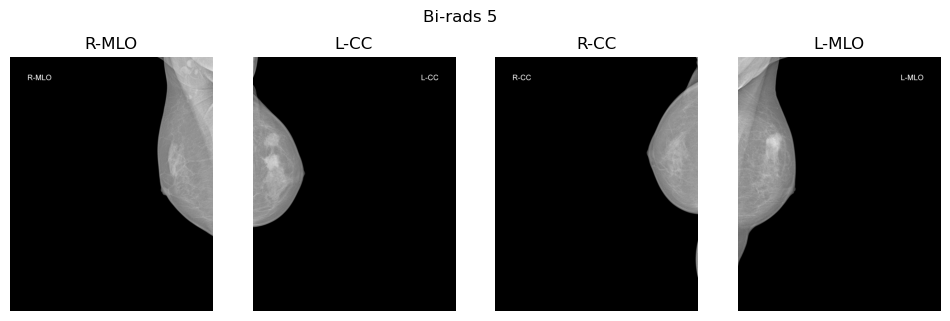

In [9]:
dcm_show_sample(2, 'Bi-rads 5')